In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq3
import UCSC_spec_db_interaction as UCSC_db
from astropy.io import fits

XTENSION BINTABLE
BITPIX 8
NAXIS 2
NAXIS1 32
NAXIS2 3839
PCOUNT 0
GCOUNT 1
TFIELDS 8
TTYPE1 flux
TFORM1 E
TTYPE2 loglam
TFORM2 E
TTYPE3 ivar
TFORM3 E
TTYPE4 and_mask
TFORM4 J
TTYPE5 or_mask
TFORM5 J
TTYPE6 wdisp
TFORM6 E
TTYPE7 sky
TFORM7 E
TTYPE8 model
TFORM8 E
EXTNAME COADD
COMMENT Coadded spectrum


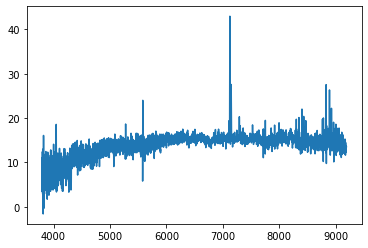

In [3]:
ps15cge_fits = fits.open('../../Foundation_Hosts/foundation_host_spectra/ps15cge_host_sdss.fits')
for h in ps15cge_fits[1].header:
    print (h, ps15cge_fits[1].header[h])
data = np.asarray(ps15cge_fits[1].data)
# wave = np.transpose(ps15cge_fits[1].data)
wave_sdss = []
flux_sdss = []
meta_dict_sdss = {'FILENAME': 'ps15cge_host_sdss.fits'}
for i, dat in enumerate(data):
#     print (dat)
    wave_sdss.append(dat[1])
    flux_sdss.append(dat[0])
plt.plot(10**np.asarray(wave_sdss),flux_sdss)
ps15cge_sdss = UCSC_db.spectrum(wavelength=10**np.asarray(wave_sdss), flux=np.asarray(flux_sdss), meta_dict=meta_dict_sdss)
plt.show()

# print (ps15cge_fits[1].data)
# print (ps15cge_fits[2].data)

In [4]:
test_query = "SELECT * from SPECTRA where filename like '%20180611%' and filename like '%combined%' and filename like '%_ap1.%'"
spectra = UCSC_db.grab_all_spec_data(test_query)

AT2018cho-combined-20180611_ap1.fits
AT2018cew-combined-20180611_ap1.fits
SN2018bdm-combined-20180611_ap1.fits
AT2018cdc-combined-20180611_ap1.fits
AT2018bcb-combined-20180611_ap1.fits
AT2018cif-combined-20180611_ap1.fits
6 Total Spectra found


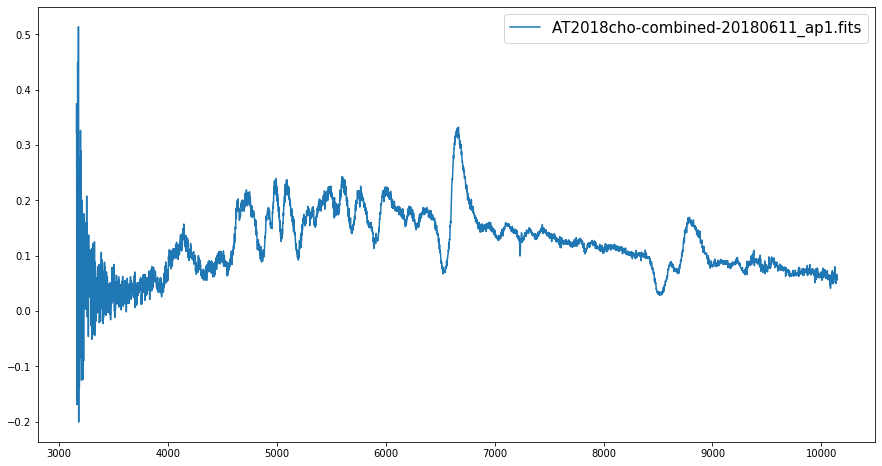

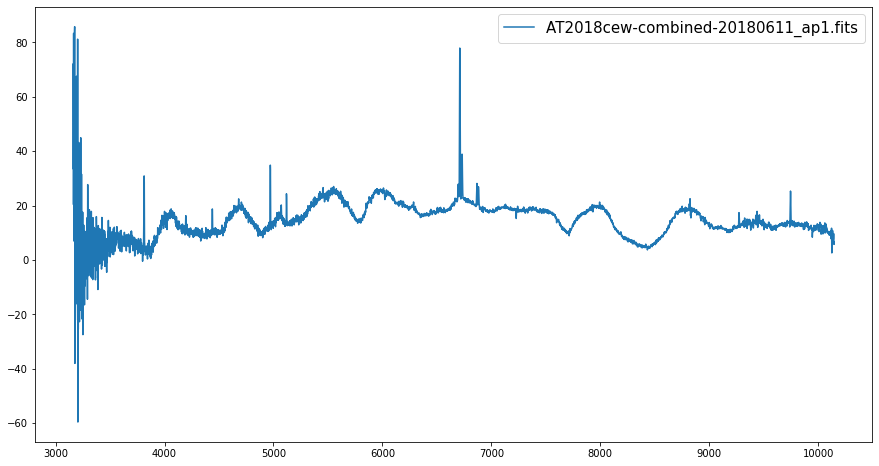

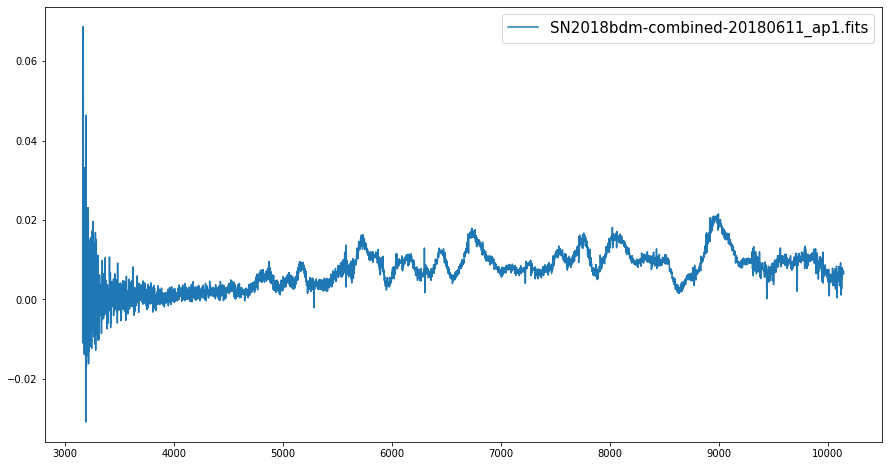

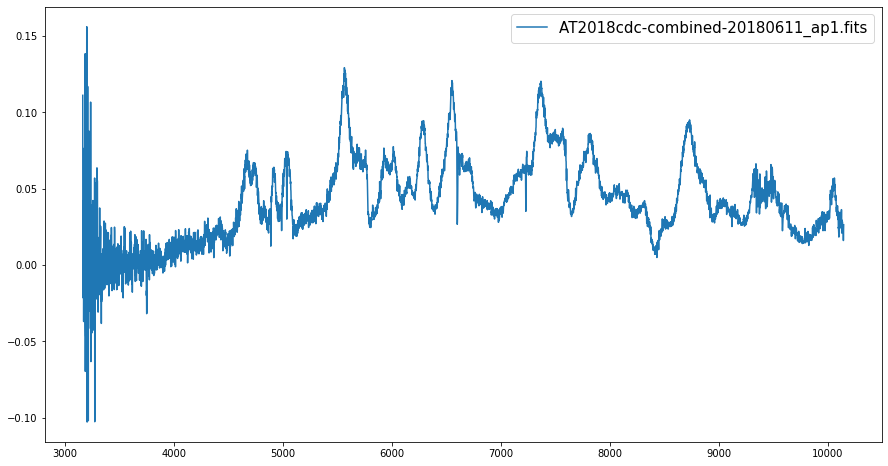

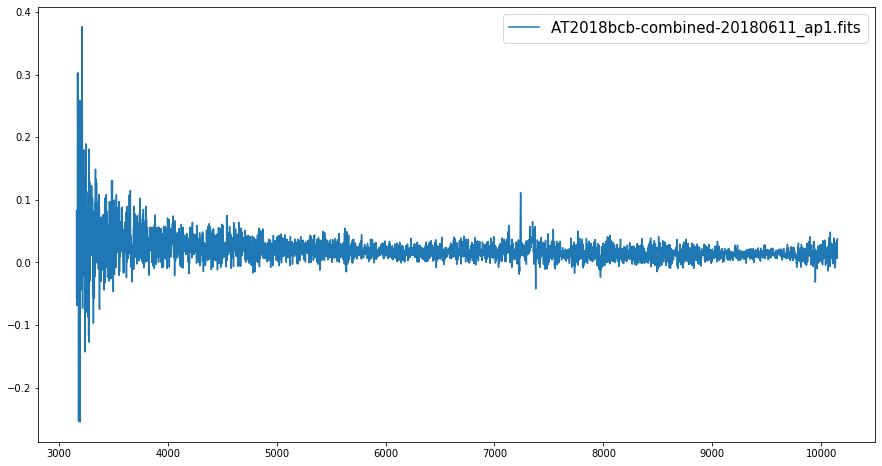

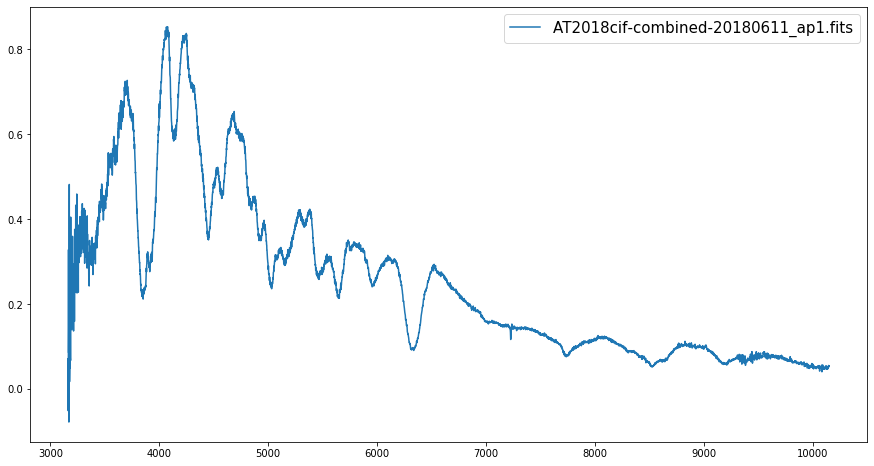

In [5]:
for spec in spectra:
    plt.figure(figsize=[15,8])
    plt.plot(spec.wavelength, spec.flux, label=spec.meta_dict['FILENAME'])
    plt.legend(fontsize=15)
    plt.show()

PS15cge-combined-20180711_ap4_1.5_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap1_1.0_kpc_BAD.fits
PS15cge-combined-20180711_ap3_1.5_kpc_BAD.fits
PS15cge-combined-20180711_ap8_3.0_kpc_SN.fits
PS15cge-combined-20180711_ap5_2.0_kpc.fits
PS15cge-combined-20180711_ap2_1.0_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap7_3.0_kpc.fits
PS15cge-combined-20180711_ap6_2.0_kpc_SN.fits
PS15cge-combined-20180711_ap17_7.4_rkron.fits
9 Total Spectra found


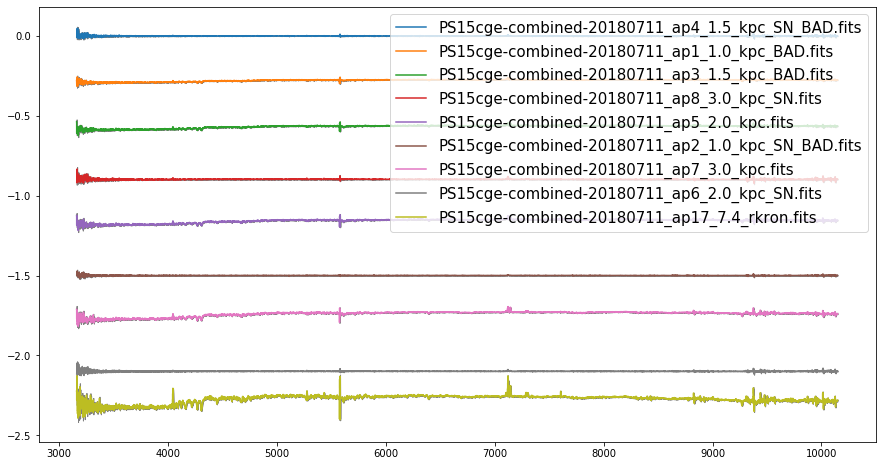

FILENAME PS15cge-combined-20180711_ap4_1.5_kpc_SN_BAD.fits
OBJECT PS15cge
SNR 2.017
EXPTIME 854.0
AIRMASS 1.072
MINWAVE 3163.1853
MAXWAVE 10146.8745
WAVEDELT 1.1853
CRVAL 3163.1853
DATE_OBS 2018-07-11
MJD 58310.577785
UTC 13:52:00.62
POS_ANG 159.0
FLUX_OBJ BD174708
RA 353.837
DEC 1.1758
OBSERVER Siebert,Kilpatrick
REDUCER msiebert
RED_DATE 2021-04-22
INSTRUMENT LRIS
GRATING 400/8500
GRISM 600/4000
DICHROIC 560
SLIT long_1.0
TELESCOPE Keck I
COMBINED 1
AP_GREATER_SEEING 0
AP_SIZE 1.5
AP_UNIT kpc
AP_LOC SN
IS_KRON_RAD 0


In [10]:
# test_query = "SELECT * from SPECTRA where OBJECT like '%16-efw%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
test_query = "SELECT * from SPECTRA where OBJECT like '%17gav%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16-efw%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
test_query = "SELECT * from SPECTRA where OBJECT like '%15cge%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
spectra = UCSC_db.query_and_plot(test_query)
for spec in spectra[0:1]:
    for m in spec.meta_dict.keys():
        print (m, spec.meta_dict[m])
        
#     print ()

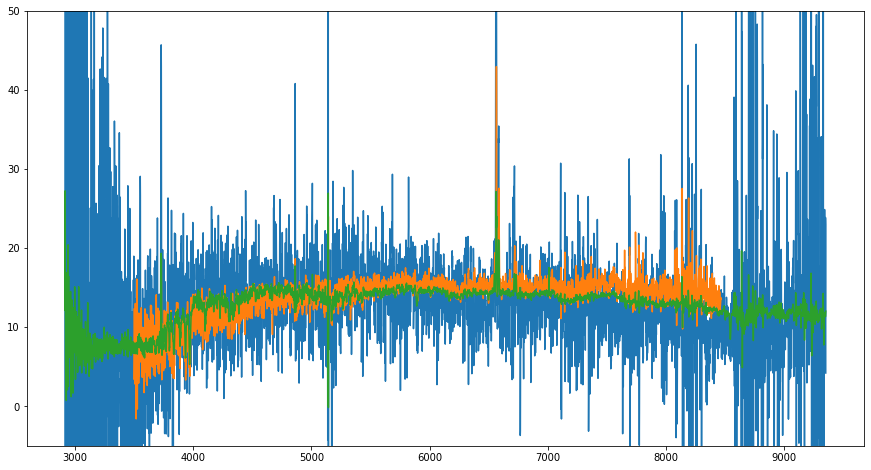

In [11]:
z = 0.0851
plt.figure(figsize=[15,8])
plt.plot(spectra[-2].wavelength/(1+z), spectra[-2].flux*7500)
plt.plot(ps15cge_sdss.wavelength/(1+z), ps15cge_sdss.flux)
# plt.plot(spectra[4].wavelength/(1+z), spectra[4].flux*300)
plt.plot(spectra[-1].wavelength/(1+z), spectra[-1].flux*100)
plt.ylim(-5,50)
# plt.plot(spectra[-2].wavelength/(1+z), spectra[4].flux)
#3" aperture sdss
#vaccum wave
plt.show()
# UCSC_db.host_line_plots([spectra[4], spectra[-2], spectra[-1]], z, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False)
# UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1]], z, region = [6400, 6800], legend = False, rescale=False)
# UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1]], z, region = [4800, 5030], legend = False, rescale=False)
# UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1]], z, region = [3550, 4150], legend = False, rescale=False)

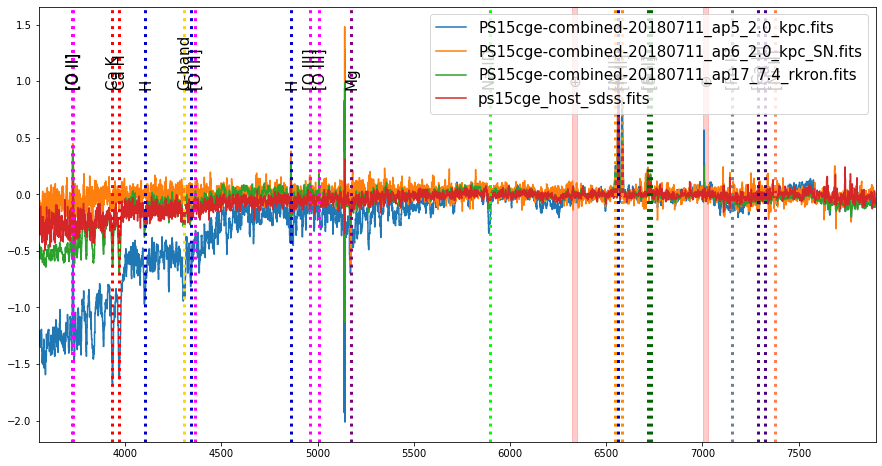

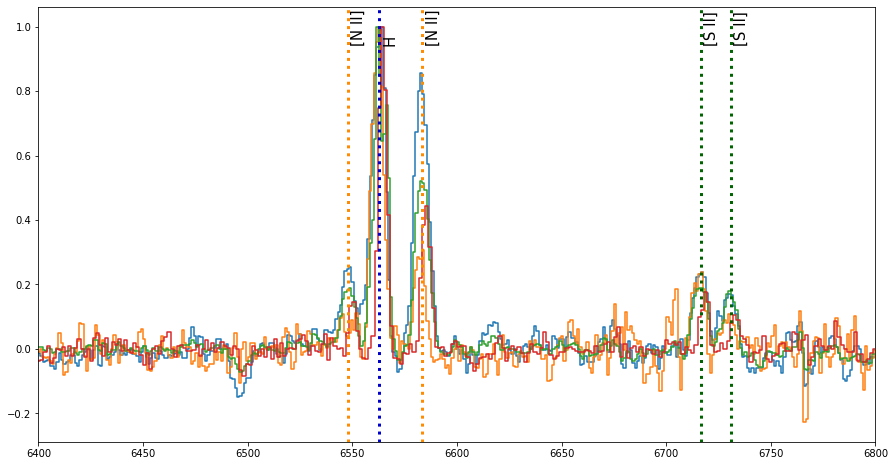

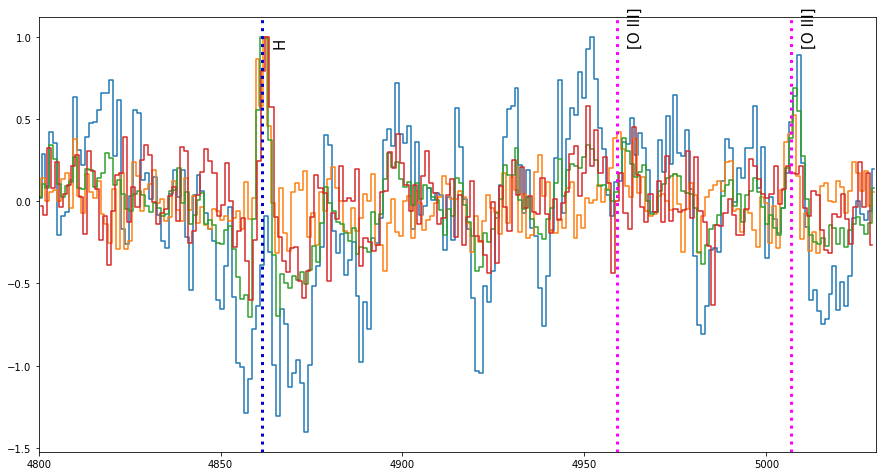

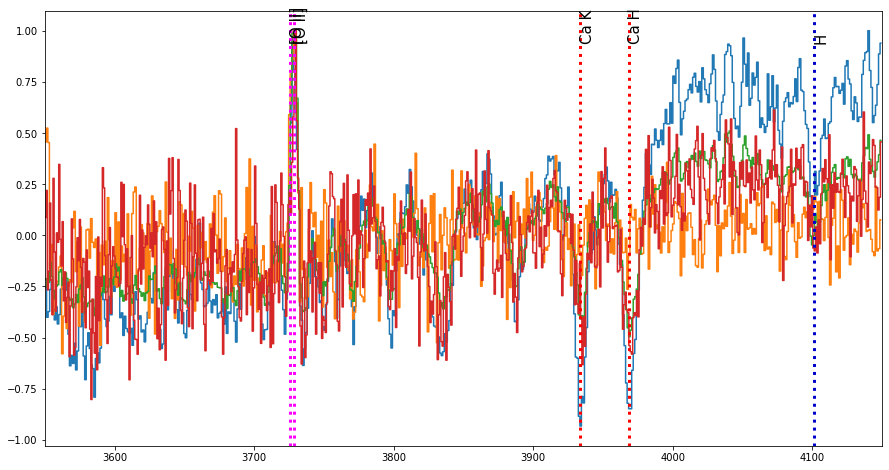

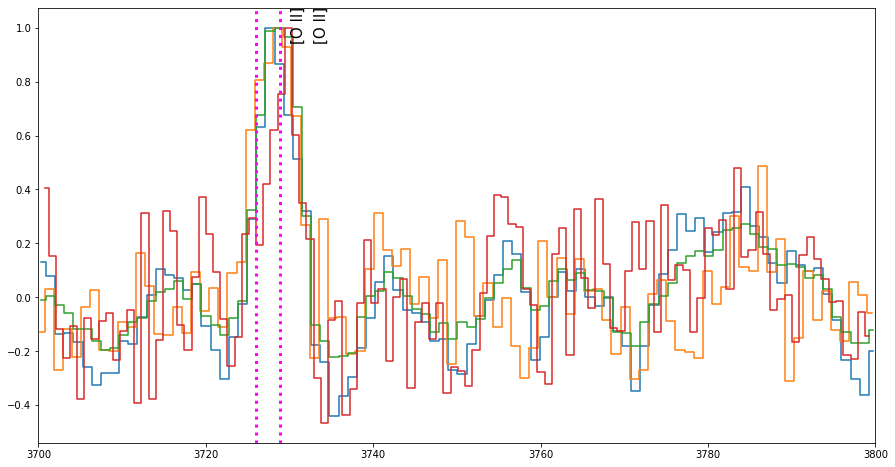

In [12]:
z = 0.0851914 # +/- 0.0000115
UCSC_db.host_line_plots([spectra[4], spectra[-2], spectra[-1], ps15cge_sdss], z, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=True)
UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1], ps15cge_sdss], z, region = [6400, 6800], legend = False, rescale=True)
# UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1], ps15cge_sdss], z, region = [6575, 6600], legend = False, rescale=True)

UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1], ps15cge_sdss], z, region = [4800, 5030], legend = False, rescale=True)
UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1], ps15cge_sdss], z, region = [3550, 4150], legend = False, rescale=True)
UCSC_db.host_line_plots([spectra[4],spectra[-2], spectra[-1], ps15cge_sdss], z, region = [3700, 3800], legend = False, rescale=True)




2017hmf-combined-20180711_ap12_4.25_rkron.fits
2017hmf-combined-20180611_ap12_4.25_rkron.fits
2 Total Spectra found


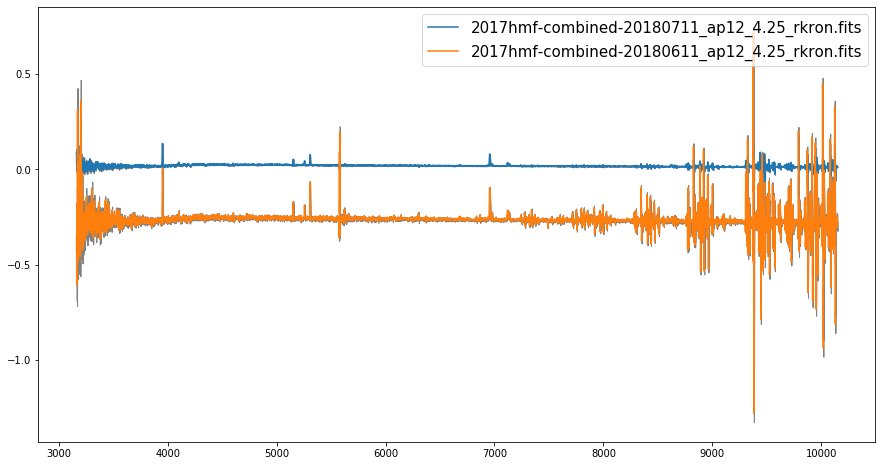

In [5]:
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pr%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' and AP_SIZE=1.5)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17gav%' and FILENAME like '%combined%' and (IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17bs%' and FILENAME like '%red%' and (IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17gfl%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc')"
# test_query = "SELECT * from SPECTRA where OBJECT like '%18jh%' and FILENAME like '%combined%' and (AP_UNIT='kpc')"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16-efw%' and FILENAME like '%combined%' and (AP_UNIT='kpc' and AP_SIZE=3)"
test_query = "SELECT * from SPECTRA where OBJECT like '%17hmf%' and FILENAME like '%combined%' and IS_KRON_RAD"

spectra = UCSC_db.query_and_plot(test_query)

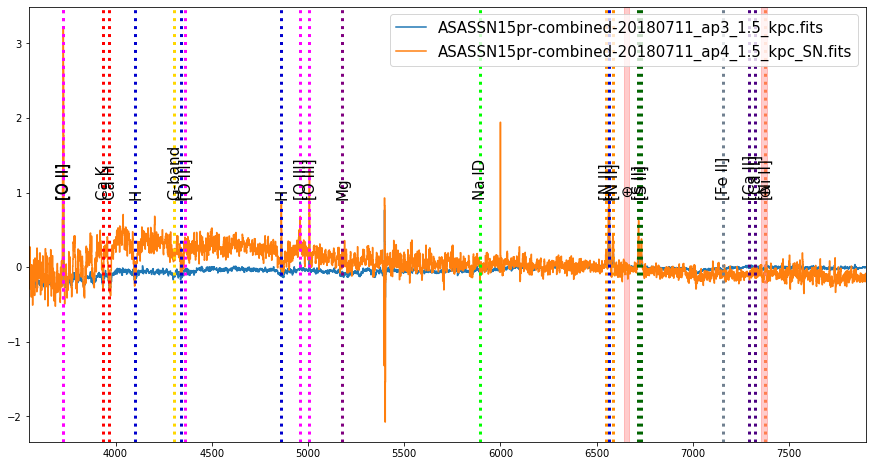

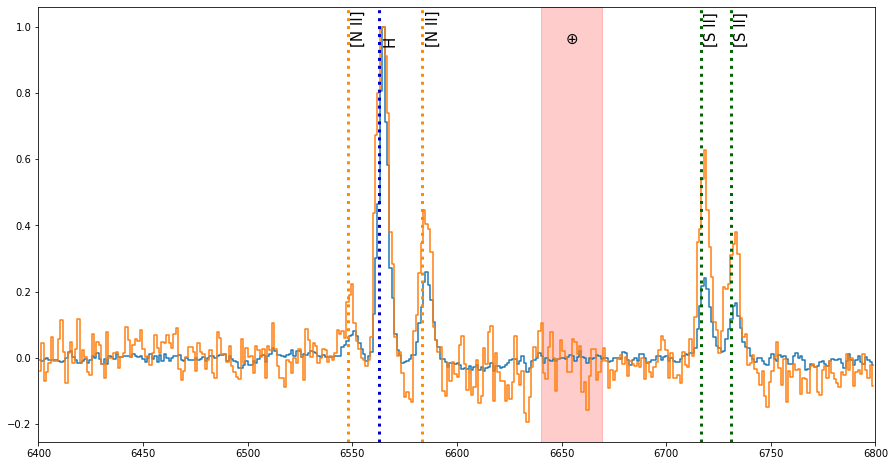

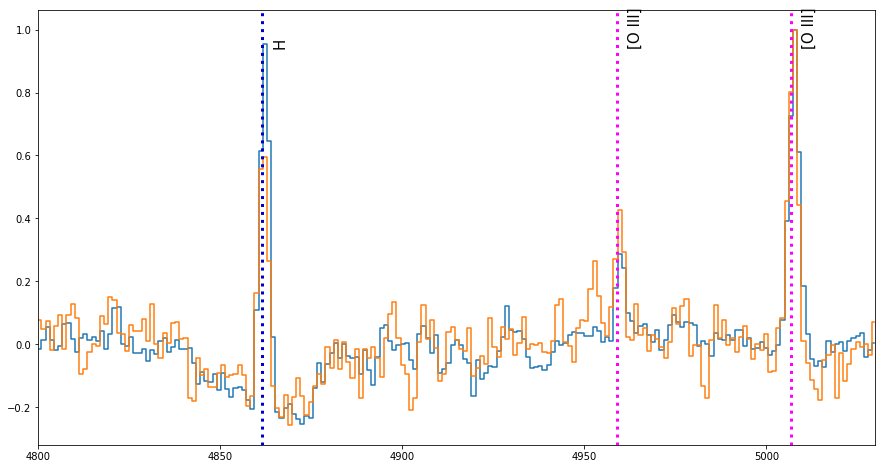

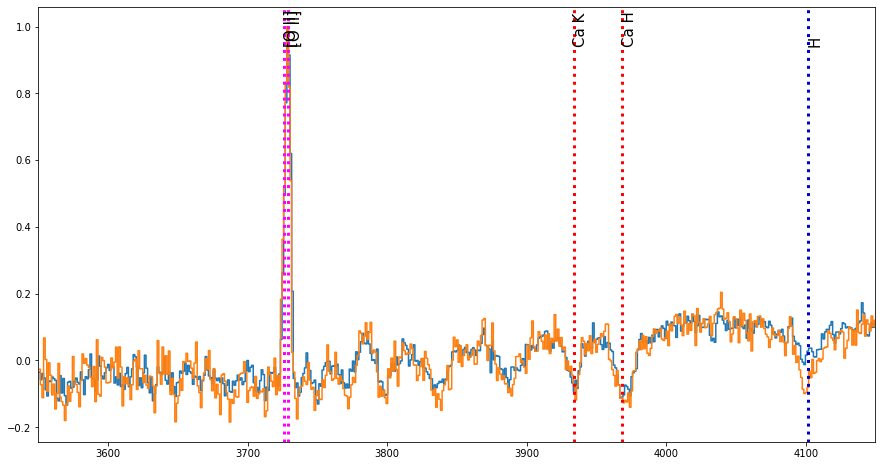

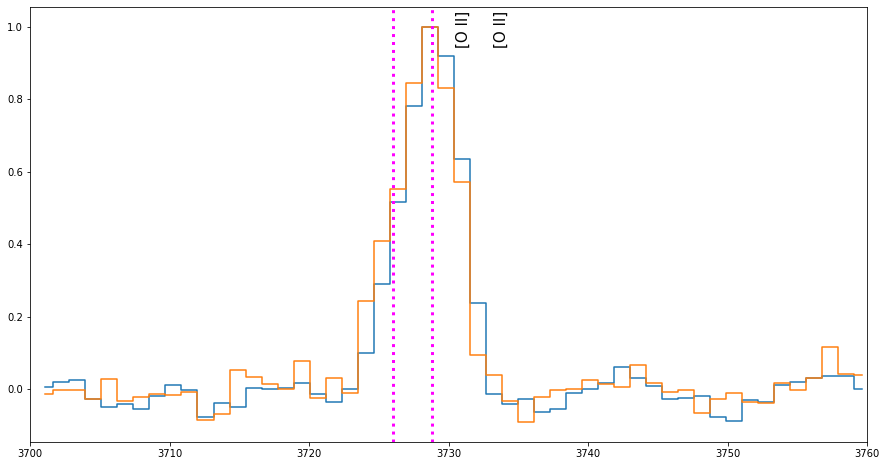

In [37]:
# z = 0.033093 #+/- 0.00015 #15pr
# z = 0.020397 #17bs
# z = 0.0619 #17hmf
# z = 0.0599 #17hmf, my z
# z = 0.0807 #17gfl, my z
# z = 0.0302 #18jh, my z
# z = 0.04286 #15mg #+/- 0.0000118248
# z = 0.035573 #+/- 0.000023 16efw
# z = 0.036 #16efw, my z
# z = 0.03235 #17gav
z = 0.033093
UCSC_db.host_line_plots(spectra, z, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=True)
UCSC_db.host_line_plots(spectra, z, region = [6400, 6800], legend = False, rescale=True)
UCSC_db.host_line_plots(spectra, z, region = [4800, 5030], legend = False, rescale=True)
UCSC_db.host_line_plots(spectra, z, region = [3550, 4150], legend = False, rescale=True)
# UCSC_db.host_line_plots(spectra, z, region = [3550, 5030], legend = False, rescale=True)
UCSC_db.host_line_plots(spectra, z, region = [3700, 3760], legend = False, rescale=True)


In [22]:
test_query = "SELECT * from SPECTRA where OBJECT like '%15mg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN.fits%'"
spectra = UCSC_db.grab_all_spec_data(test_query)

ASASSN15mg_1-combined-20180611_ap5_2.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap3_1.5_kpc.fits
ASASSN15mg_1-combined-20180611_ap1_1.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap6_3.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap13_14.02_rkron.fits
5 Total Spectra found


ASASSN15mg_1-combined-20180611_ap5_2.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap3_1.5_kpc.fits
ASASSN15mg_1-combined-20180611_ap1_1.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap6_3.0_kpc.fits
ASASSN15mg_1-combined-20180611_ap13_14.02_rkron.fits
5 Total Spectra found


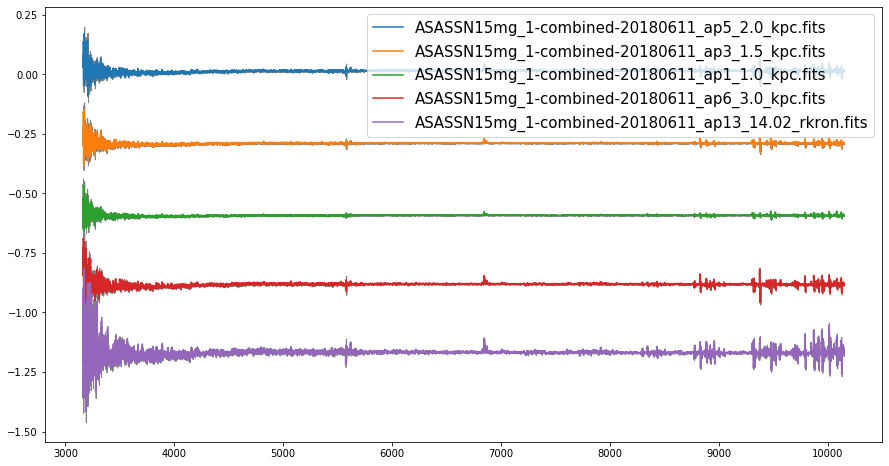

In [23]:
spectra = UCSC_db.query_and_plot(test_query)

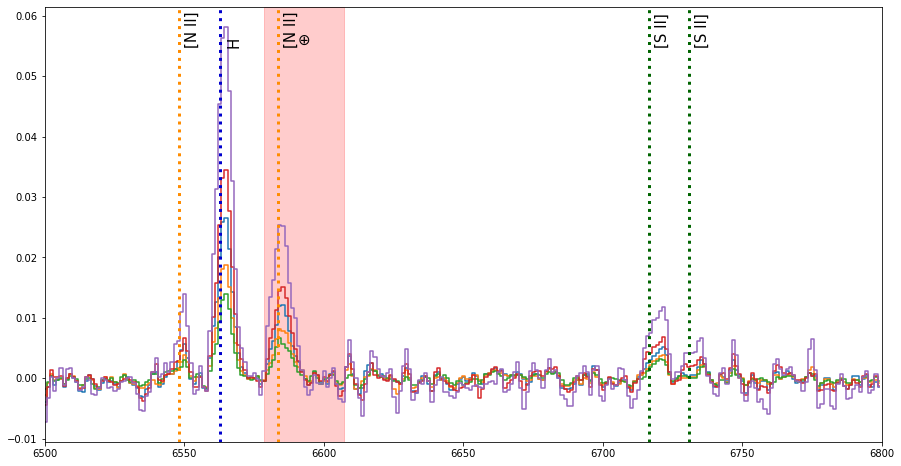

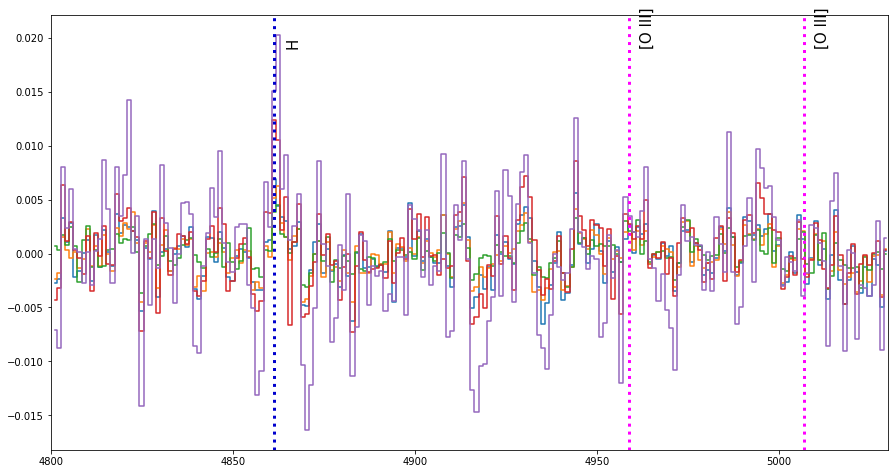

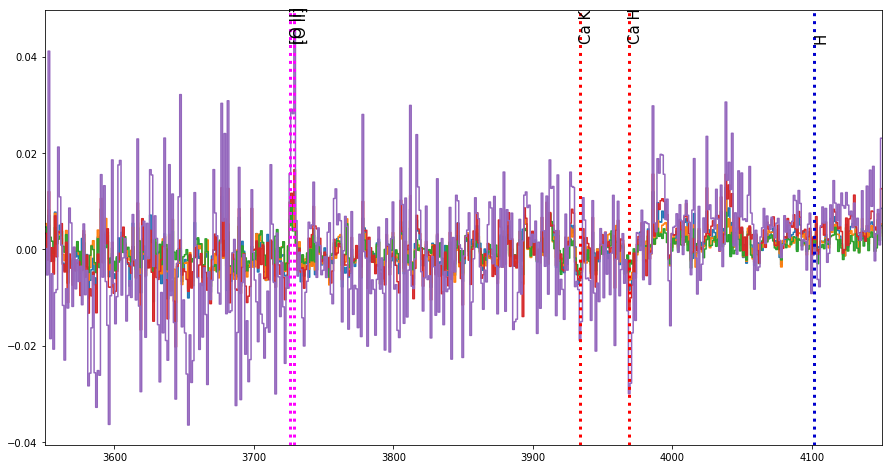

In [25]:
z = 0.0427777 #true
# z = 0.0431
UCSC_db.host_line_plots(spectra, z, region = [6500, 6800], legend = False)
UCSC_db.host_line_plots(spectra, z, region = [4800, 5030], legend = False)
UCSC_db.host_line_plots(spectra, z, region = [3550, 4150], legend = False)